# Prikazovanje podatkov - osnonvo

## Representation Of Data



## Introduction To The Data

In [2]:
! ls data

fandango_scores.csv  graf2.PNG	graf4.PNG	  unrate.csv
graf1.PNG	     graf3.PNG	recent-grads.csv


In [1]:
import pandas as pd
import numpy as np

In [2]:
unrate = pd.read_csv("data/unrate.csv")

In [3]:
unrate

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
819,2016-04-01,5.0
820,2016-05-01,4.7
821,2016-06-01,4.9
822,2016-07-01,4.9


In [4]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    824 non-null    object 
 1   VALUE   824 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


In [5]:
unrate["DATE"] = pd.to_datetime(unrate["DATE"])

In [6]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    824 non-null    datetime64[ns]
 1   VALUE   824 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


In [7]:
unrate.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


## Introduction to matplotlib

https://bokeh.org/

https://plotly.com/python/

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
import matplotlib
print(f'matplotlib: {matplotlib.__version__}')

matplotlib: 3.6.1


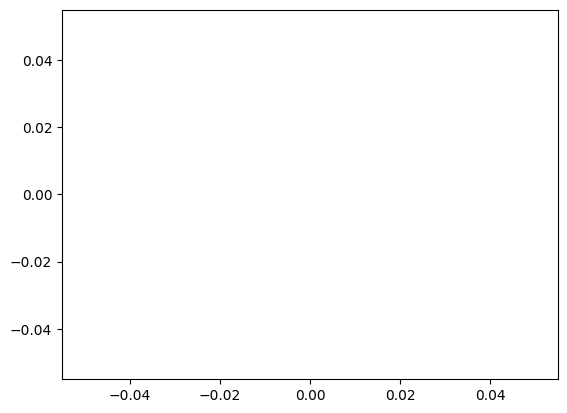

In [10]:
plt.plot()
plt.show()

## Axis Ticks

In [11]:
first_data = unrate[0:36]

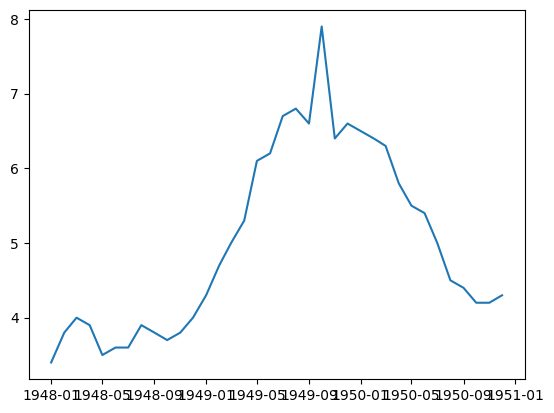

In [12]:
plt.plot(first_data["DATE"], first_data["VALUE"])
plt.show()

### Fixing Axis Ticks

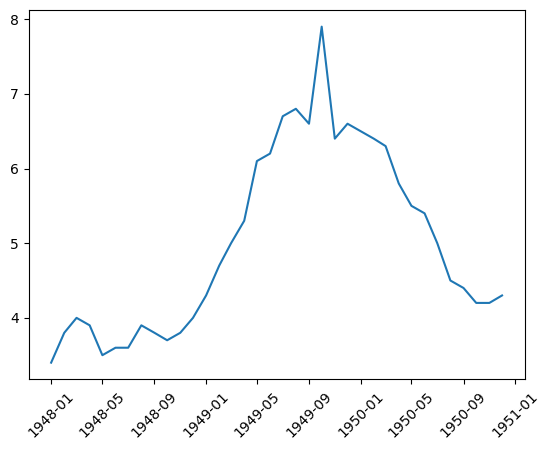

In [13]:
first_data = unrate[0:36]
plt.plot(first_data["DATE"], first_data["VALUE"])
plt.xticks(rotation=45)
plt.show()

### Adding Axis Labels And A Title

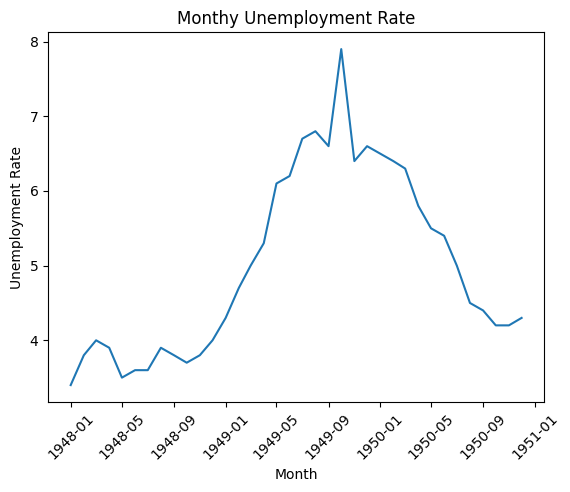

In [14]:
first_data = unrate[0:36]
plt.plot(first_data["DATE"], first_data["VALUE"])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthy Unemployment Rate")
plt.show()


## DN Pandas rešitev

In [19]:
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))

In [20]:
ser

0     4
1     2
2     2
3     3
4     3
5     4
6     1
7     1
8     1
9     3
10    3
11    4
dtype: int64

In [25]:
ser[~ser.isin(ser.value_counts().index[:2])] = "Other"

In [26]:
ser

0         4
1     Other
2     Other
3         3
4         3
5         4
6     Other
7     Other
8     Other
9         3
10        3
11        4
dtype: object

## Matplotlib Classes

    axes_obj = fig.add_subplot(nrows, ncols, plot_number)

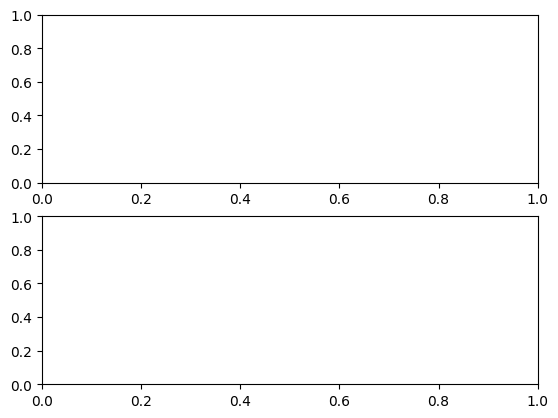

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

## Grid Positioning


<p><img alt="Multiple Subplots" src="images/multiple_subplots.png"></p>

<p><img alt="Subplot Grid" src="images/subplot_grid.png"></p>

<p><img alt="Missing One Plot" src="images/multiple_subplots_missing_one_plot.png"></p></div>

## Adding Data

In [33]:
first_twelve = unrate[0:12]
second_twelve = unrate[12:24]

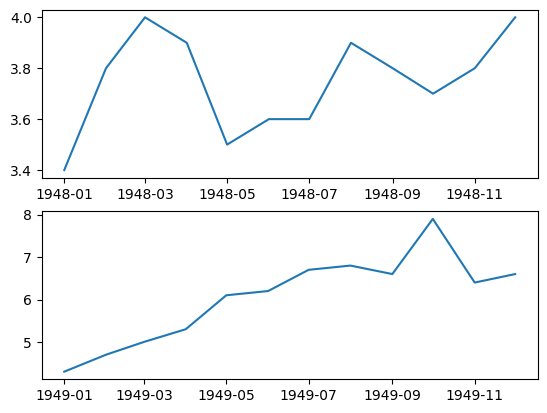

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(first_twelve["DATE"], first_twelve["VALUE"])
ax2.plot(second_twelve["DATE"], second_twelve["VALUE"])
plt.show()

## Formatting And Spacing

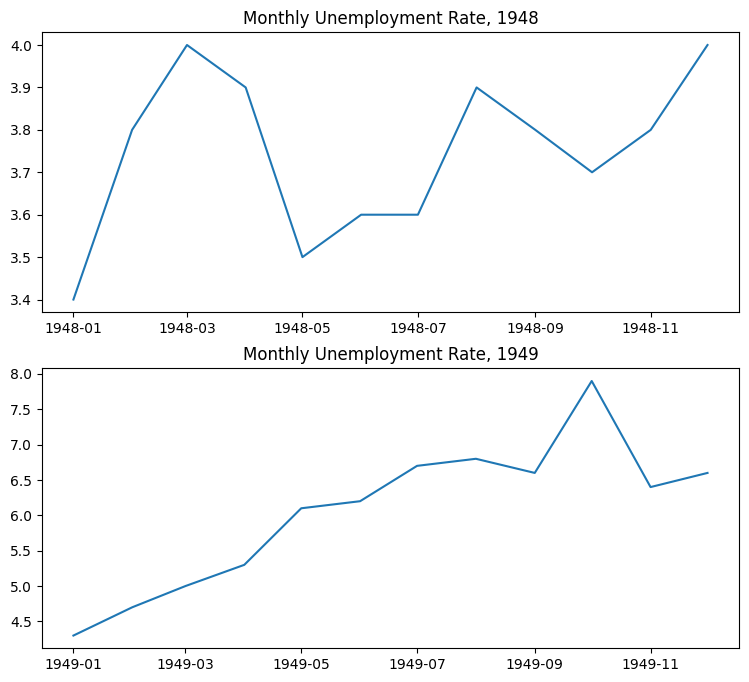

In [39]:
fig = plt.figure(figsize=(9,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]["DATE"], unrate[0:12]["VALUE"])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]["DATE"], unrate[12:24]["VALUE"])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

## Comparing Across More Years

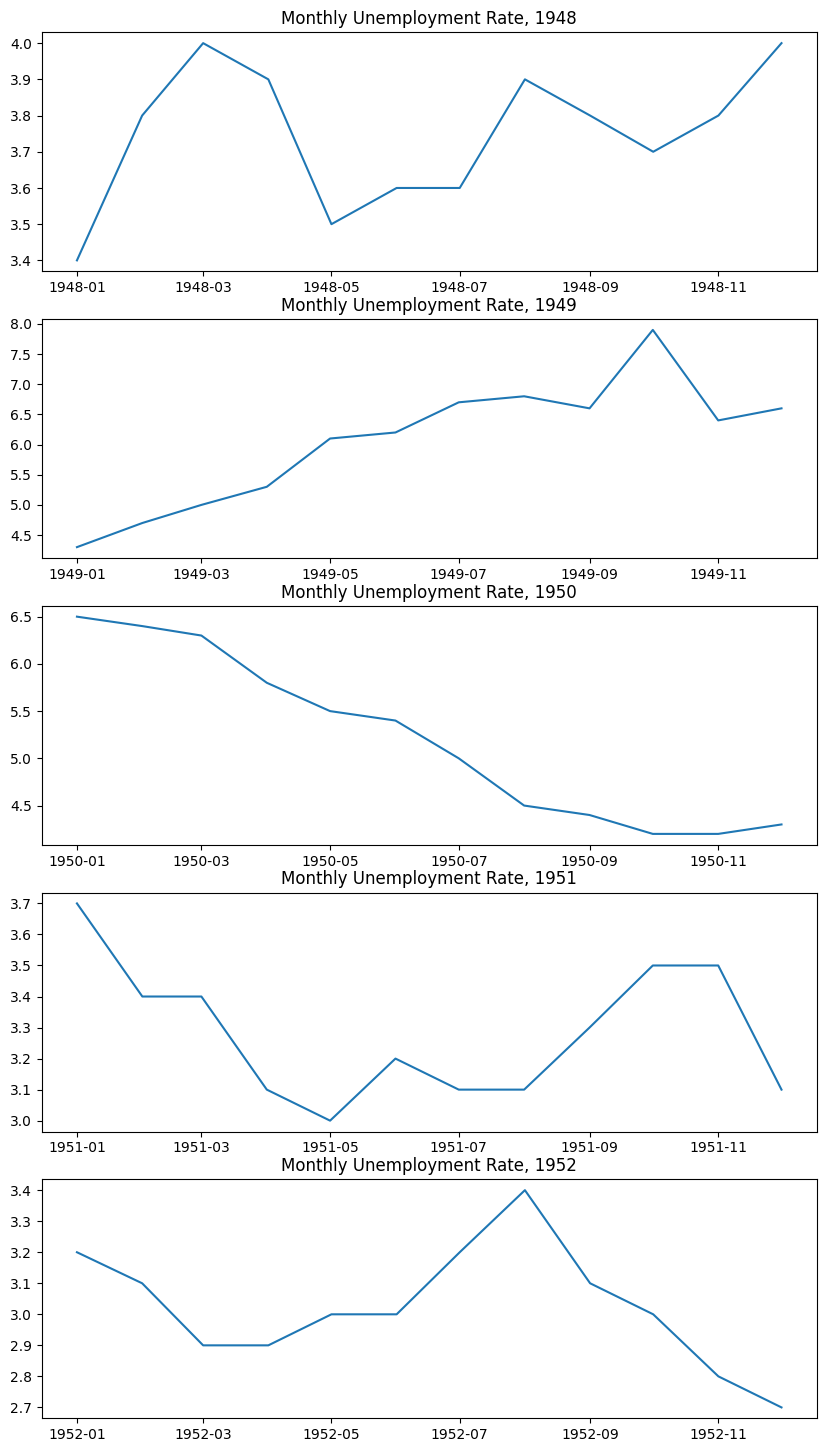

In [47]:
fig = plt.figure(figsize=(10,18))

NUM_OF_YEARS = 5

for i in range(NUM_OF_YEARS):
    ax = fig.add_subplot(NUM_OF_YEARS, 1, i+1)
    start_index = i*12
    end_index = (i+1) * 12
    subset = unrate[start_index:end_index]
    ax.plot(subset["DATE"], subset["VALUE"])
    ax.set_title(f'Monthly Unemployment Rate, {1948 + i}')

plt.show()

## Overlaying Line Charts

In [49]:
unrate["MONTH"] = unrate["DATE"].dt.month

In [50]:
unrate

,DATE,VALUE,MONTH
0,1948-01-01,3.4,1
1,1948-02-01,3.8,2
2,1948-03-01,4.0,3
3,1948-04-01,3.9,4
4,1948-05-01,3.5,5
...,...,...,...
819,2016-04-01,5.0,4
820,2016-05-01,4.7,5
821,2016-06-01,4.9,6
822,2016-07-01,4.9,7


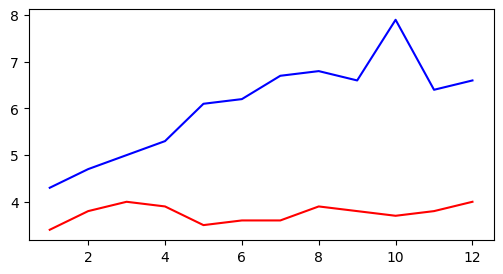

In [54]:
fig = plt.figure(figsize=(6,3))
plt.plot(unrate[0:12]["MONTH"], unrate[0:12]["VALUE"], c="red")
plt.plot(unrate[12:24]["MONTH"], unrate[12:24]["VALUE"], c="blue")
plt.show()

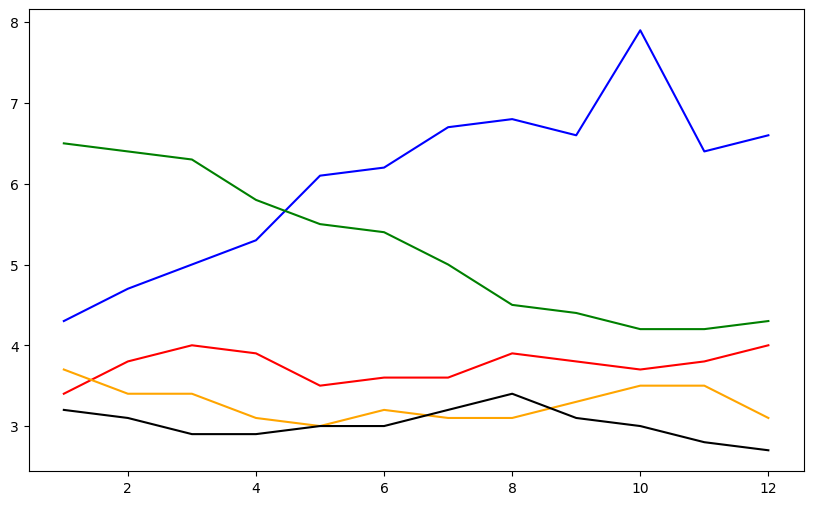

In [55]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']

NUM_OF_YEARS = 5

for i in range(NUM_OF_YEARS):
    start_index = i*12
    end_index = (i+1) * 12
    subset = unrate[start_index:end_index]
    plt.plot(subset["MONTH"], subset["VALUE"], c=colors[i])

plt.show()

## Adding A Legend

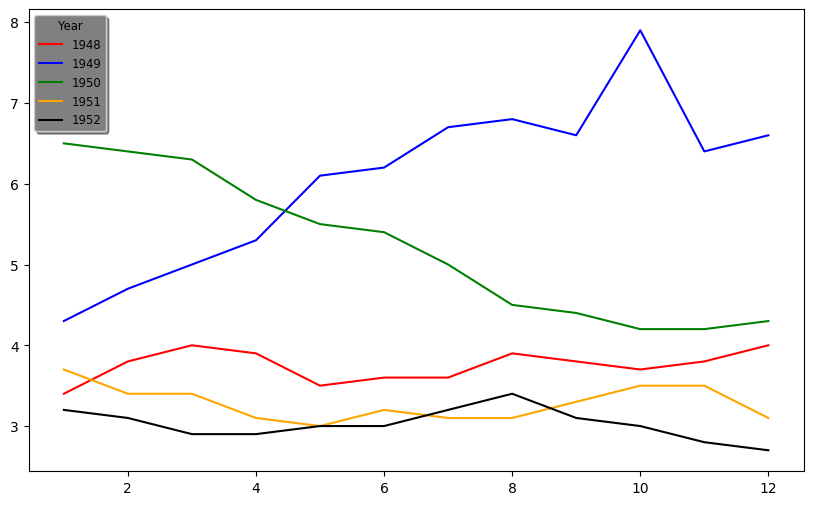

In [63]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)

    
plt.legend(loc="upper left", title="Year", title_fontsize="small",shadow=True, fontsize="small", facecolor="grey")   
plt.show()

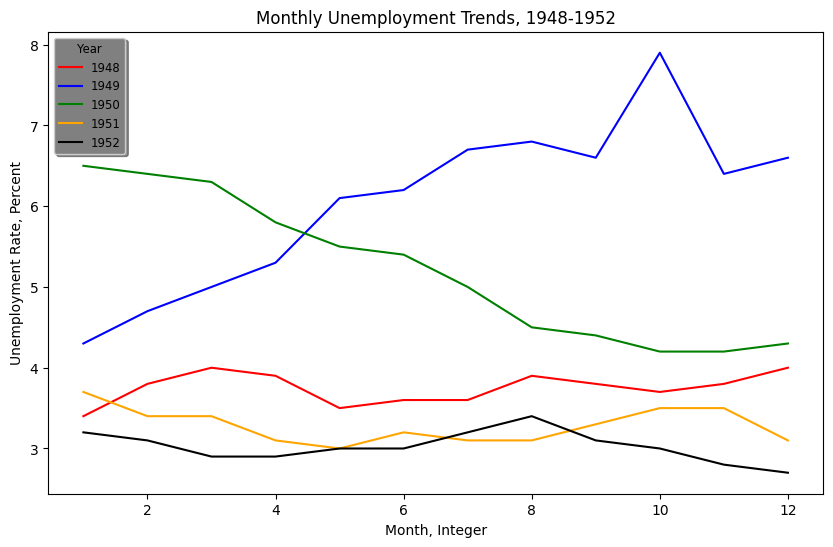

In [64]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)

    
plt.legend(loc="upper left", title="Year", title_fontsize="small",shadow=True, fontsize="small", facecolor="grey")  

plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.show()

## Introduction to the data

In [65]:
import pandas as pd

In [66]:
reviews = pd.read_csv('data/fandango_scores.csv')

In [67]:
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 
        'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

In [108]:
norm_reviews = reviews[cols].copy()

In [69]:
norm_reviews.head()

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.0,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.5,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.2,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0,3.5


## Bar Plots


<p><img alt="Vertical Bar Plot" src="images/vertical_bar_plot.png"></p>


<p><img alt="Horizontal Bar Plot" src="images/horizontal_bar_plot.png"></p>


### Creating Bars


<p><img alt="Matplotlib Barplot Positioning" src="images/matplotlib_barplot_positioning.png"></p>


In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arange

In [85]:
# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

In [72]:
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

In [78]:
bar_heights = norm_reviews[num_cols].iloc[0].values

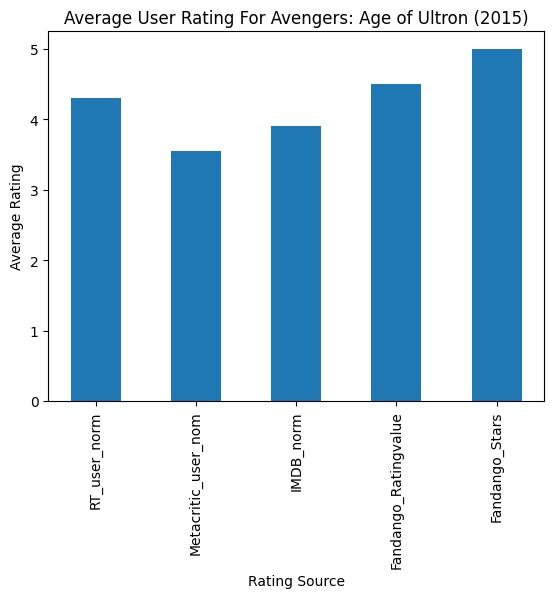

In [89]:
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width=0.5, align="edge")
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

### Horizontal Bar Plot

In [90]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

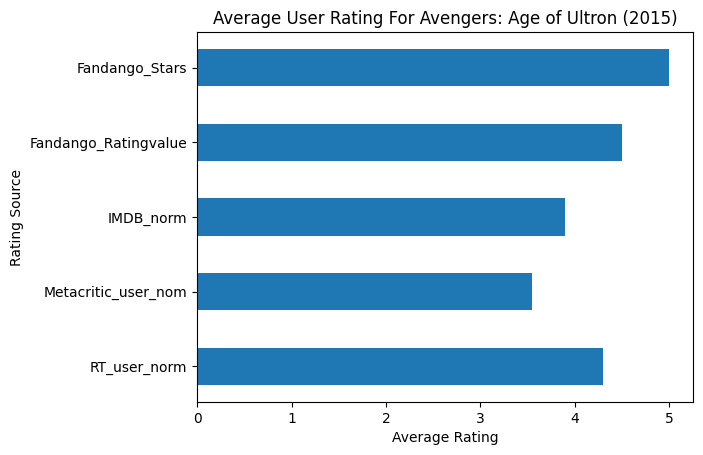

In [93]:
fig, ax = plt.subplots()

ax.barh(bar_positions, bar_widths, height=0.5, align="edge")
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

## Scatter plot


<p><img alt="Imgur" src="images/scatter_plot_intro.png"></p>


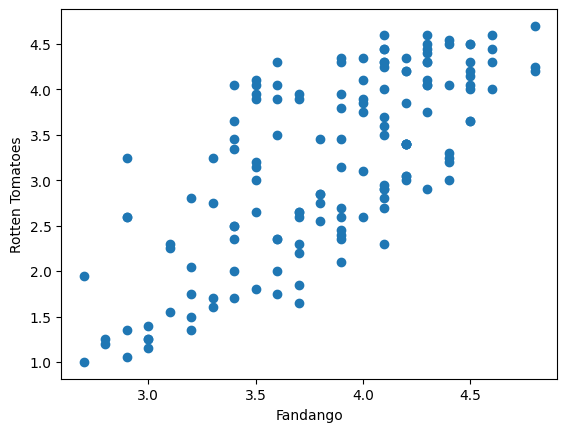

In [94]:
fig, ax = plt.subplots()

ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])

ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")
plt.show()

### Benchmarking correlation

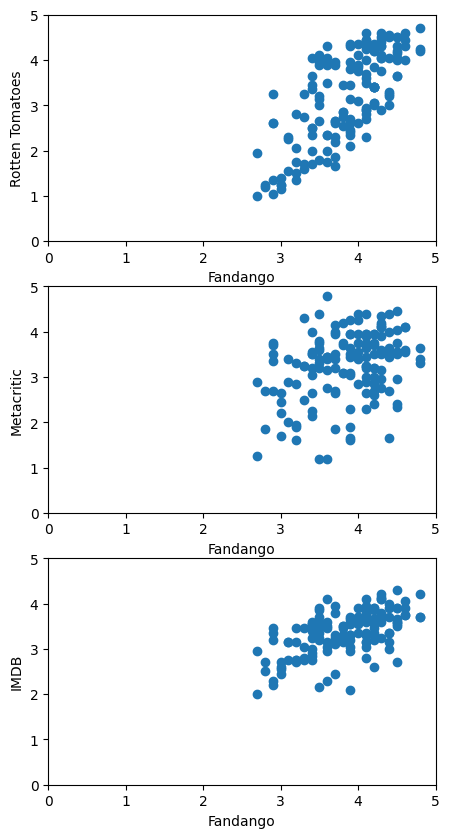

In [95]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel("Fandango")
ax2.set_ylabel("Metacritic")
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("IMDB")
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

## Histogram

### Frequency Distribution

In [98]:
freq_counts = norm_reviews["Fandango_Ratingvalue"].value_counts().sort_index()

In [99]:
freq_counts

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

### Binning


<p><img alt="Binning Introduction" src="images/histogram_binning.png"></p>


### Histogram In Matplotlib

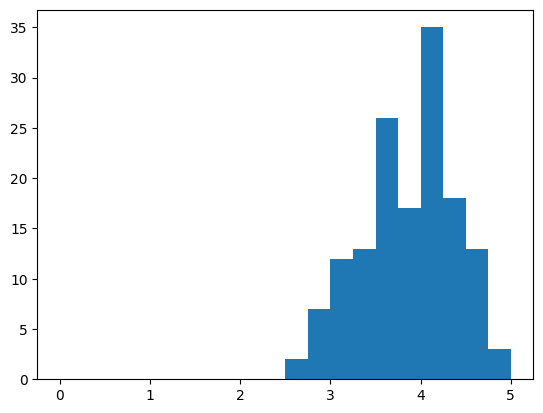

In [103]:
fig, ax = plt.subplots()
ax.hist(norm_reviews["Fandango_Ratingvalue"], bins=20,  range=(0,5))
plt.show()

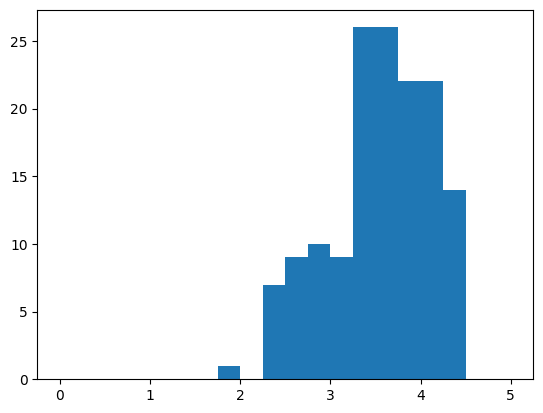

In [113]:
norm_reviews["mean_rating"] = norm_reviews.mean(axis=1, numeric_only=True)

fig, ax = plt.subplots()
ax.hist(norm_reviews["mean_rating"], bins=20,  range=(0,5))
plt.show()

### Comparing histograms

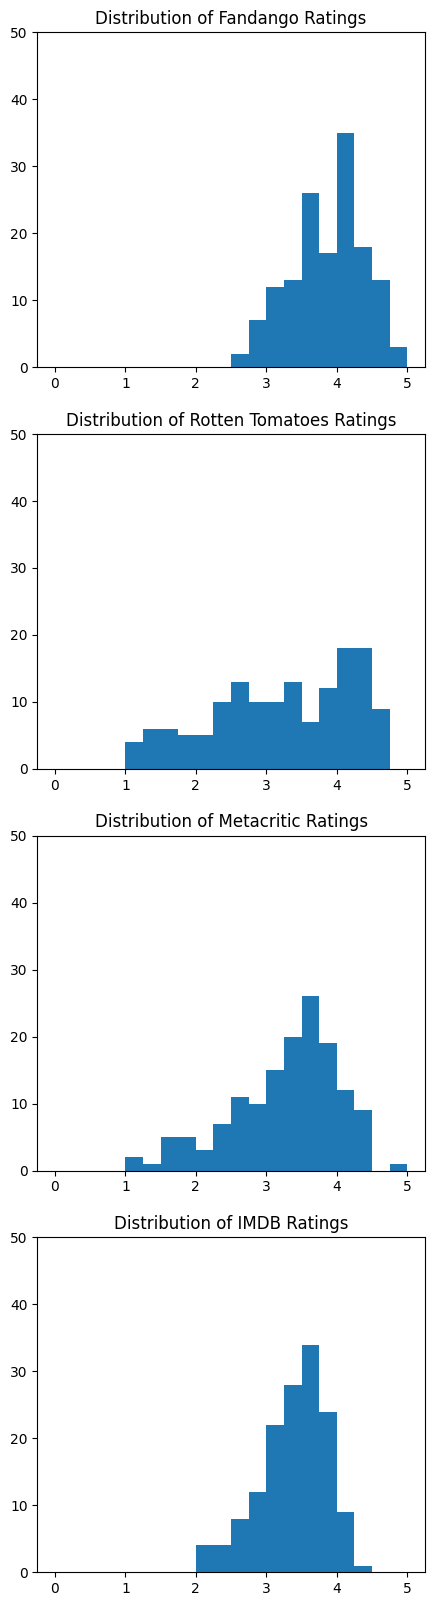

In [114]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0,5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50)

ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0,5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0,50)

ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0,5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0,50)

ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50)

plt.show()

### Quartiles

## Box Plot


<p><img alt="Boxplot" src="images/boxplot_intro.png"></p>


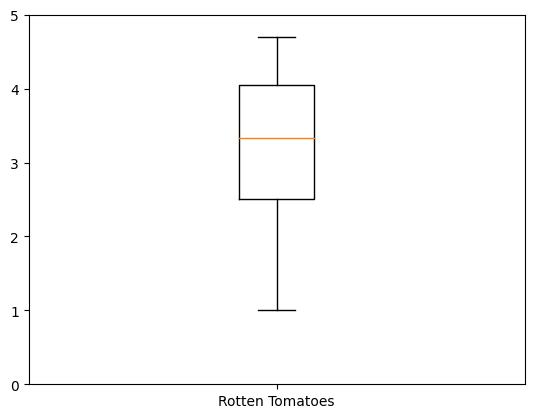

In [116]:
fig, ax = plt.subplots()

ax.boxplot(norm_reviews["RT_user_norm"])
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0,5)
plt.show()

### Multiple Box Plots

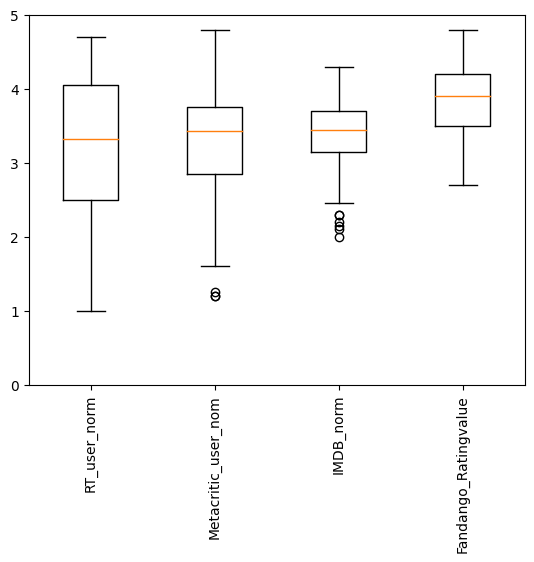

In [119]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)
plt.show()